In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load the dataset
data = pd.read_excel("/content/CreditScoreData.xlsx")

df = pd.DataFrame(data)

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,320,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
1,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,323,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
2,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,324,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
3,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,326,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
4,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.544229,207,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23924,0x25faf,CUS_0x2084,June,Ryanl,21,253-72-7758,Architect,38321.39,3106.647859,4,...,Good,678.57,37.367063,208,No,362.072453,26.701680,High_spent_Large_value_payments,434.472091,Standard
23925,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133-16-7738,Writer,37188.10,3097.008333,1,...,Good,620.64,39.080823,357,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good
23926,0x25fcf,CUS_0xaf61,February,Chris Wickhamm,49,133-16-7738,Writer,37188.10,3097.008333,1,...,Good,620.64,32.803431,358,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good
23927,0x25fd1,CUS_0xaf61,April,Chris Wickhamm,49,133-16-7738,Writer,37188.10,3097.008333,1,...,Good,620.64,36.979007,360,No,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good


In [ ]:
df.shape

(23929, 28)

In [ ]:
# Finding the duplicate data
df.duplicated().sum()

0

In [ ]:
# Drop any rows with missing values
df.dropna()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,320,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
1,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,323,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
2,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,324,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
3,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,326,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
4,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.544229,207,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23924,0x25faf,CUS_0x2084,June,Ryanl,21,253-72-7758,Architect,38321.39,3106.647859,4,...,Good,678.57,37.367063,208,No,362.072453,26.701680,High_spent_Large_value_payments,434.472091,Standard
23925,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133-16-7738,Writer,37188.10,3097.008333,1,...,Good,620.64,39.080823,357,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good
23926,0x25fcf,CUS_0xaf61,February,Chris Wickhamm,49,133-16-7738,Writer,37188.10,3097.008333,1,...,Good,620.64,32.803431,358,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good
23927,0x25fd1,CUS_0xaf61,April,Chris Wickhamm,49,133-16-7738,Writer,37188.10,3097.008333,1,...,Good,620.64,36.979007,360,No,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good


In [ ]:
# Finding the null data
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 2526
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age_Months       0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [ ]:
# Getting some informaiton about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23929 entries, 0 to 23928
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         23929 non-null  object 
 1   Customer_ID                23929 non-null  object 
 2   Month                      23929 non-null  object 
 3   Name                       23929 non-null  object 
 4   Age                        23929 non-null  int64  
 5   SSN                        23929 non-null  object 
 6   Occupation                 23929 non-null  object 
 7   Annual_Income              23929 non-null  float64
 8   Monthly_Inhand_Salary      23929 non-null  float64
 9   Num_Bank_Accounts          23929 non-null  int64  
 10  Num_Credit_Card            23929 non-null  int64  
 11  Interest_Rate              23929 non-null  int64  
 12  Num_of_Loan                23929 non-null  int64  
 13  Type_of_Loan               21403 non-null  obj

In [ ]:
# Creating a functin to clean the columns title from white spaces and unwanted characters
import re
def cleaning_strings(strings):
  result = []
  for value in strings:
    value = value.strip()
    value = re.sub('[!#?]', '', value)
    result.append(value)
  return result

In [ ]:
# Call the function
df.columns = cleaning_strings(df.columns)

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age_Months',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23929 entries, 0 to 23928
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         23929 non-null  object 
 1   Customer_ID                23929 non-null  object 
 2   Month                      23929 non-null  object 
 3   Name                       23929 non-null  object 
 4   Age                        23929 non-null  int64  
 5   SSN                        23929 non-null  object 
 6   Occupation                 23929 non-null  object 
 7   Annual_Income              23929 non-null  float64
 8   Monthly_Inhand_Salary      23929 non-null  float64
 9   Num_Bank_Accounts          23929 non-null  int64  
 10  Num_Credit_Card            23929 non-null  int64  
 11  Interest_Rate              23929 non-null  int64  
 12  Num_of_Loan                23929 non-null  int64  
 13  Type_of_Loan               21403 non-null  obj

In [ ]:
# Derive statistical information about our data
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,23929.000000,2.392900e+04,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000
mean,33.079318,1.763162e+05,4058.284044,5.647541,5.611058,15.038196,3.621965,21.853483,32.564294,10.724694,26.874253,1474.496219,32.308757,217.536880,1405.129656,183.589488,395.406894
std,10.754151,1.454727e+06,3094.751876,2.361770,2.051159,8.766724,2.450192,14.862409,235.619725,6.846783,186.092299,1179.950043,5.067172,99.635405,8267.951098,179.559979,206.014475
min,14.000000,7.005930e+03,303.645417,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-6.440000,0.000000,0.340000,20.881250,2.000000,0.000000,0.000000,0.453456
25%,24.000000,1.907062e+04,1598.545833,4.000000,4.000000,8.000000,2.000000,11.000000,9.000000,5.680000,3.000000,589.670000,28.134611,140.000000,30.886669,69.400703,268.814851
50%,33.000000,3.622812e+04,3004.209167,6.000000,6.000000,14.000000,3.000000,19.000000,14.000000,9.690000,6.000000,1203.170000,32.371198,216.000000,68.574904,124.360652,332.575924
75%,41.000000,7.073778e+04,5804.050000,8.000000,7.000000,20.000000,5.000000,29.000000,19.000000,15.340000,9.000000,2061.500000,36.494176,298.000000,156.531442,227.234038,461.618099
max,56.000000,2.419806e+07,15204.633333,10.000000,10.000000,76.000000,9.000000,67.000000,4397.000000,36.290000,2594.000000,4998.070000,49.564519,404.000000,82204.000000,1646.388176,1566.613165


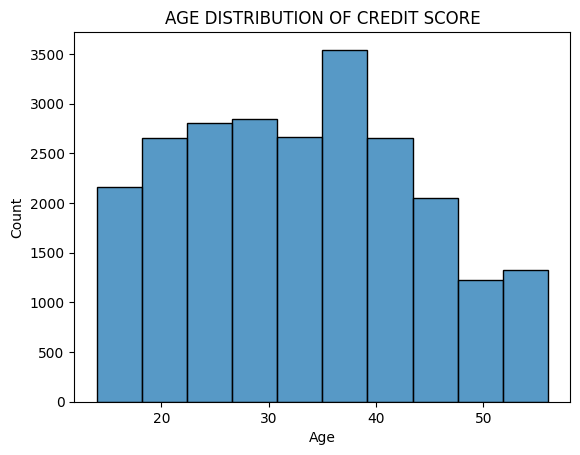

In [ ]:
#Data Visualization
sns.histplot(data['Age'], bins=10)
plt.xlabel('Age')
plt.title('AGE DISTRIBUTION OF CREDIT SCORE')
plt.show()

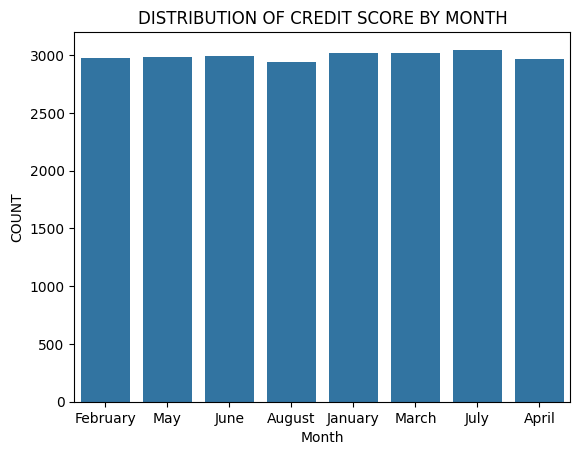

In [ ]:
sns.countplot(x='Month', data=data)
plt.xlabel('Month')
plt.ylabel('COUNT')
plt.title('DISTRIBUTION OF CREDIT SCORE BY MONTH')
plt.show()

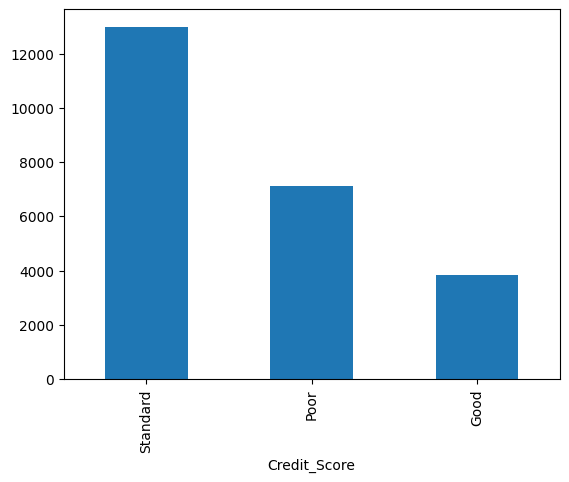

In [ ]:
data['Credit_Score'].value_counts().plot(kind='bar')  # target variable
plt.show()

In [ ]:
# Encode categorical variables ( Converting all object variables to int)
label_encoders = {}
categorical_cols = ["ID", "Customer_ID", "Month", "Name", "SSN", "Occupation", "Annual_Income",
                    "Monthly_Inhand_Salary", "Type_of_Loan", "Credit_Mix", "Outstanding_Debt",
                    "Payment_of_Min_Amount", "Total_EMI_per_month", "Amount_invested_monthly",
                    "Payment_Behaviour","Monthly_Balance", "Credit_Score"]
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])




In [ ]:
# Spliting the dataset into features (X) and target variable (y)
X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

# Spliting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize and train of models
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)



In [ ]:
# Create a logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Train the classifier on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

In [ ]:
# Evaluate the Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluate Logistic Regression classifier
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Classifier Accuracy:", accuracy_logistic)

print("\nLogistic Regression Classifier Classification Report:")
print(classification_report(y_test, y_pred_logistic))


# Evaluate Gradient Boosting classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Classifier Accuracy:", accuracy_gb)
print("\nGradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.7693272043460092

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       746
           1       0.76      0.77      0.76      1402
           2       0.80      0.80      0.80      2638

    accuracy                           0.77      4786
   macro avg       0.74      0.74      0.74      4786
weighted avg       0.77      0.77      0.77      4786

Logistic Regression Classifier Accuracy: 0.5842039281236941

Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.00      0.00       746
           1       0.55      0.50      0.53      1402
           2       0.60      0.79      0.68      2638

    accuracy                           0.58      4786
   macro avg       0.41      0.43      0.40      4786
weighted avg       0.50      0.58      0.53      4786


Gradient Boosting Classifier Accuracy: 0.7198077726702884

Gradient B

In [ ]:
# Using correlation matrix for feature selection

df.corr()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,1.000000,0.000065,-0.001798,-0.011289,-0.007814,-0.011985,0.007881,-0.001657,0.000079,-0.017111,...,0.001433,-0.029171,0.005588,0.016565,-0.001112,-0.010010,-0.001248,-0.000685,0.004940,-0.003094
Customer_ID,0.000065,1.000000,-0.002839,0.005980,-0.004189,0.016991,0.002025,0.007328,0.007545,-0.002132,...,-0.016289,0.007197,-0.000720,-0.010302,0.003588,0.014694,0.012673,0.005485,-0.008812,0.000841
Month,-0.001798,-0.002839,1.000000,-0.009077,0.011529,-0.004425,0.000302,0.014833,0.014991,-0.004548,...,0.004462,-0.008387,0.000226,0.008204,-0.014565,-0.001237,0.011991,0.001027,0.010623,0.010056
Name,-0.011289,0.005980,-0.009077,1.000000,-0.022446,0.022629,0.014557,-0.004702,-0.003916,0.009812,...,0.000945,0.013950,-0.000334,0.012444,0.003625,0.001586,-0.010373,-0.010100,0.003308,-0.002706
Age,-0.007814,-0.004189,0.011529,-0.022446,1.000000,-0.013422,-0.009317,0.089779,0.089474,-0.179008,...,0.085232,-0.207949,0.024137,0.234368,-0.224197,-0.074014,0.063611,-0.033985,0.122716,-0.043603
SSN,-0.011985,0.016991,-0.004425,0.022629,-0.013422,1.000000,-0.017698,-0.015389,-0.015914,0.025904,...,-0.000157,0.007089,0.009559,-0.009288,0.010343,-0.011000,-0.004584,0.011600,-0.010999,0.009352
Occupation,0.007881,0.002025,0.000302,0.014557,-0.009317,-0.017698,1.000000,-0.001115,-0.003548,0.020558,...,0.006969,0.005273,0.001344,-0.007138,0.006873,-0.007883,0.008027,0.004385,-0.006783,0.008112
Annual_Income,-0.001657,0.007328,0.014833,-0.004702,0.089779,-0.015389,-0.001115,1.000000,0.973003,-0.246945,...,0.123979,-0.277641,0.135525,0.268000,-0.242497,0.470501,0.622081,-0.367145,0.575160,-0.046236
Monthly_Inhand_Salary,0.000079,0.007545,0.014991,-0.003916,0.089474,-0.015914,-0.003548,0.973003,1.000000,-0.250944,...,0.128542,-0.284579,0.140081,0.275385,-0.245171,0.474098,0.640060,-0.377693,0.592075,-0.047798
Num_Bank_Accounts,-0.017111,-0.002132,-0.004548,0.009812,-0.179008,0.025904,0.020558,-0.246945,-0.250944,1.000000,...,-0.288918,0.500048,-0.060586,-0.466475,0.460800,0.108553,-0.187346,0.074534,-0.285404,0.134395


In [ ]:
cor = df.corr()
cor_target = abs(cor["Credit_Score"])

In [ ]:
cor_target_org = cor["Credit_Score"]

In [ ]:
cor_target_org

ID                          -0.003094
Customer_ID                  0.000841
Month                        0.010056
Name                        -0.002706
Age                         -0.043603
SSN                          0.009352
Occupation                   0.008112
Annual_Income               -0.046236
Monthly_Inhand_Salary       -0.047798
Num_Bank_Accounts            0.134395
Num_Credit_Card              0.077423
Interest_Rate                0.096133
Num_of_Loan                  0.043723
Type_of_Loan                -0.008448
Delay_from_due_date          0.068131
Num_of_Delayed_Payment       0.005389
Changed_Credit_Limit         0.174363
Num_Credit_Inquiries         0.011441
Credit_Mix                   0.230777
Outstanding_Debt             0.000545
Credit_Utilization_Ratio    -0.017324
Credit_History_Age_Months   -0.079575
Payment_of_Min_Amount        0.223003
Total_EMI_per_month         -0.029048
Amount_invested_monthly     -0.048500
Payment_Behaviour            0.003402
Monthly_Bala

In [ ]:
cor_target

ID                           0.003094
Customer_ID                  0.000841
Month                        0.010056
Name                         0.002706
Age                          0.043603
SSN                          0.009352
Occupation                   0.008112
Annual_Income                0.046236
Monthly_Inhand_Salary        0.047798
Num_Bank_Accounts            0.134395
Num_Credit_Card              0.077423
Interest_Rate                0.096133
Num_of_Loan                  0.043723
Type_of_Loan                 0.008448
Delay_from_due_date          0.068131
Num_of_Delayed_Payment       0.005389
Changed_Credit_Limit         0.174363
Num_Credit_Inquiries         0.011441
Credit_Mix                   0.230777
Outstanding_Debt             0.000545
Credit_Utilization_Ratio     0.017324
Credit_History_Age_Months    0.079575
Payment_of_Min_Amount        0.223003
Total_EMI_per_month          0.029048
Amount_invested_monthly      0.048500
Payment_Behaviour            0.003402
Monthly_Bala

In [ ]:
chosen_features = cor_target[cor_target>0.1]

In [ ]:
chosen_features

Num_Bank_Accounts        0.134395
Changed_Credit_Limit     0.174363
Credit_Mix               0.230777
Payment_of_Min_Amount    0.223003
Credit_Score             1.000000
Name: Credit_Score, dtype: float64

In [ ]:
ls1 = list(chosen_features.index.values)
# .index().tolist()

In [ ]:
ls1

['Num_Bank_Accounts',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Credit_Score']

In [ ]:
df_new = df[ls1]

In [ ]:
df_new

,Num_Bank_Accounts,Changed_Credit_Limit,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,2,7.42,1,0,0
1,2,6.42,1,0,0
2,2,5.42,1,0,0
3,2,5.42,1,0,0
4,2,1.99,1,0,2
...,...,...,...,...,...
23924,4,1.59,1,0,2
23925,1,5.38,1,0,0
23926,1,5.38,1,0,0
23927,1,5.38,1,0,0


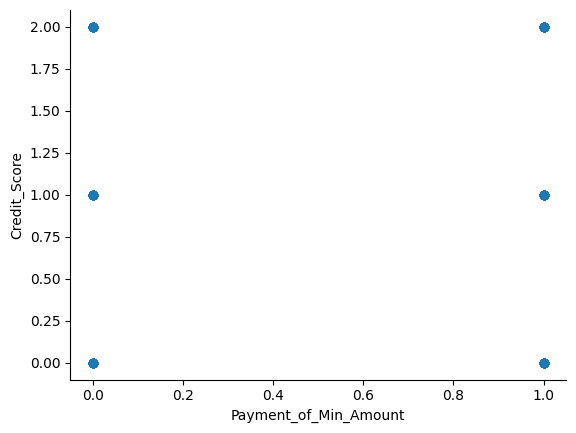

In [ ]:
# @title Payment_of_Min_Amount vs Credit_Score

from matplotlib import pyplot as plt
df_new.plot(kind='scatter', x='Payment_of_Min_Amount', y='Credit_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

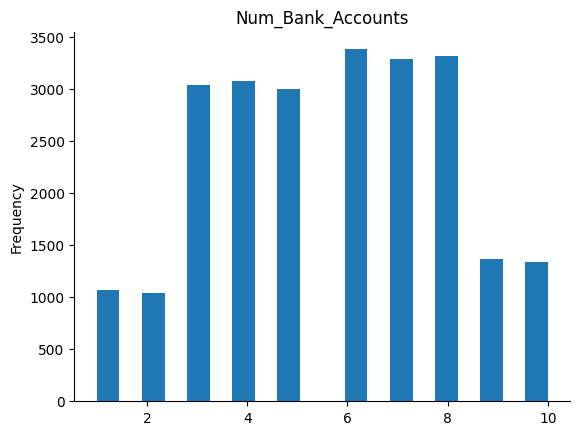

In [ ]:
# @title Num_Bank_Accounts

from matplotlib import pyplot as plt
df_new['Num_Bank_Accounts'].plot(kind='hist', bins=20, title='Num_Bank_Accounts')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X_feat = df_new.drop(columns=['Credit_Score'])
y = df['Credit_Score']

In [ ]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

 #Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)


# logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Train the classifier on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_regression.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluate the Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluate Logistic Regression classifier
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Classifier Accuracy:", accuracy_logistic)

print("\nLogistic Regression Classifier Classification Report:")
print(classification_report(y_test, y_pred_logistic))


# Evaluate Gradient Boosting classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Classifier Accuracy:", accuracy_gb)
print("\nGradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.7693272043460092

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       746
           1       0.76      0.77      0.76      1402
           2       0.80      0.80      0.80      2638

    accuracy                           0.77      4786
   macro avg       0.74      0.74      0.74      4786
weighted avg       0.77      0.77      0.77      4786

Logistic Regression Classifier Accuracy: 0.5842039281236941

Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.00      0.00       746
           1       0.55      0.50      0.53      1402
           2       0.60      0.79      0.68      2638

    accuracy                           0.58      4786
   macro avg       0.41      0.43      0.40      4786
weighted avg       0.50      0.58      0.53      4786


Gradient Boosting Classifier Accuracy: 0.7198077726702884

Gradient B